# BLACK FRIDAY SALES PREDICTION

In [5]:
import numpy as np, pandas as pd

In [6]:
train = pd.read_csv('blackfriday(train).csv')

In [3]:
test = pd.read_csv('blackfriday(test).csv')

In [4]:
train.shape, test.shape

((550068, 12), (233599, 11))

In [5]:
train.isnull().sum(axis=0),test.isnull().sum(axis=0) 

(User_ID                            0
 Product_ID                         0
 Gender                             0
 Age                                0
 Occupation                         0
 City_Category                      0
 Stay_In_Current_City_Years         0
 Marital_Status                     0
 Product_Category_1                 0
 Product_Category_2            173638
 Product_Category_3            383247
 Purchase                           0
 dtype: int64, User_ID                            0
 Product_ID                         0
 Gender                             0
 Age                                0
 Occupation                         0
 City_Category                      0
 Stay_In_Current_City_Years         0
 Marital_Status                     0
 Product_Category_1                 0
 Product_Category_2             72344
 Product_Category_3            162562
 dtype: int64)

##### for Product_Category_2 and Product_Categrory_3 would mean that the concerned person did not buy the products from these categories. SO,replace them with 0.

In [6]:
data = pd.concat([train,test])

C:\Users\Thanusha Devarajula\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [7]:
data.shape

(783667, 12)

Replacing the NAN values with Zero.
fro both train, test.

In [8]:
data.fillna(0,inplace=True)

In [9]:
data.isnull().sum(axis=0)

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
dtype: int64

### Checking the data types 

In [10]:
data.dtypes 

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [11]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,0.0,0.0,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,0.0,0.0,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,0.0,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,0.0,0.0,P00285442,7969.0,4+,1000002


In [12]:
data.nunique()

Age                               7
City_Category                     3
Gender                            2
Marital_Status                    2
Occupation                       21
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Product_ID                     3677
Purchase                      18106
Stay_In_Current_City_Years        5
User_ID                        5891
dtype: int64

In [13]:
# there are 5 categorical columns, 7 numerical columns
# But, here after finding the unique values for each columns ordinal type

In [14]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [15]:
data["Age"].replace('0-17','17',inplace=True)
data["Age"].replace('55+','56',inplace=True)
data["Age"].replace('26-35','30',inplace=True)
data["Age"].replace('46-50','48',inplace=True)
data["Age"].replace('51-55','53',inplace=True)
data["Age"].replace('36-45','40',inplace=True)
data["Age"].replace('18-25','21',inplace=True)

In [16]:
data["City_Category"].unique()

array(['A', 'C', 'B'], dtype=object)

In [17]:
data["Gender"].unique()

array(['F', 'M'], dtype=object)

In [18]:
data["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [19]:
data["Occupation"].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [20]:
data["Product_Category_1"].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

In [21]:
data["Product_Category_2"].unique()

array([ 0.,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [22]:
data["Product_Category_3"].unique()

array([ 0., 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [23]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [24]:
data["User_ID"].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [25]:
data["User_ID"].nunique()

5891

In [26]:
from sklearn.preprocessing import LabelEncoder
le = preprocessing.LabelEncoder()

NameError: name 'preprocessing' is not defined

### Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [28]:

data.hist(column="Occupation",grid=False)
plt.xlabel("Occupation",fontsize=15)
plt.ylabel("Frequency",fontsize=15)

NameError: name 'plt' is not defined

In [29]:
plt.figure()
data.boxplot(['Occupation'],grid= False)

NameError: name 'plt' is not defined

In [30]:
data['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,     0.])

In [31]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,17,A,F,0,10,3,0.0,0.0,P00069042,8370.0,2,1000001
1,17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,17,A,F,0,10,12,0.0,0.0,P00087842,1422.0,2,1000001
3,17,A,F,0,10,12,14.0,0.0,P00085442,1057.0,2,1000001
4,56,C,M,0,16,8,0.0,0.0,P00285442,7969.0,4+,1000002


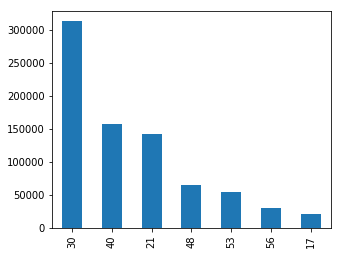

In [32]:
data['Age'].value_counts().plot(kind="bar",figsize=(5,4)) #*customer of age 30 are buying more for the list          

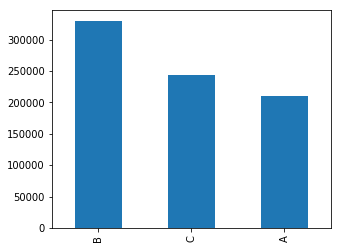

In [33]:
data['City_Category'].value_counts().plot(kind="bar",figsize=(5,4))     ## customer of city-B are buying more for the list        

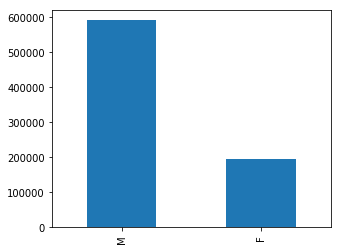

In [34]:
data['Gender'].value_counts().plot(kind="bar",figsize=(5,4)) # Males are buying more for the list      

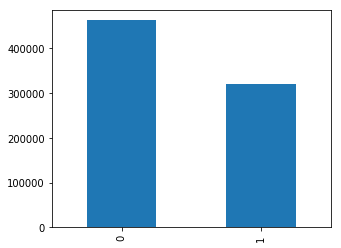

In [35]:
data['Marital_Status'].value_counts().plot(kind="bar",figsize=(5,4)) #umarried are buying more for the list              

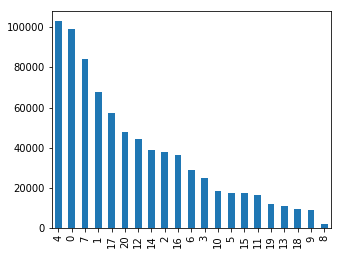

In [36]:
data['Occupation'].value_counts().plot(kind="bar",figsize=(5,4)) #umarried are buying more for the list              

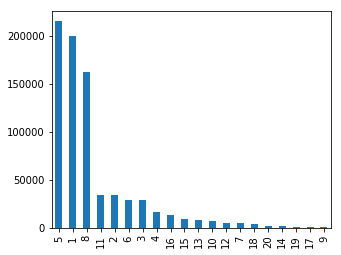

In [37]:
data['Product_Category_1'].value_counts().plot(kind="bar",figsize=(5,4)) # products from 2nd category are most likely for buy

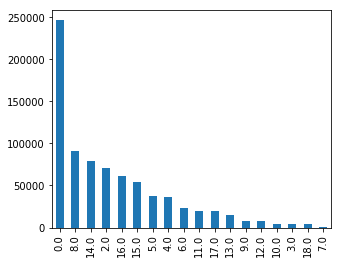

In [38]:
data['Product_Category_2'].value_counts().plot(kind="bar",figsize=(5,4))                

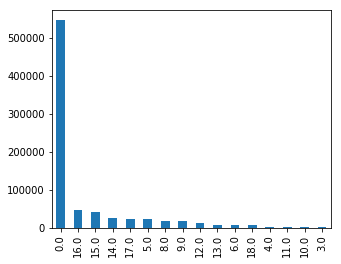

In [39]:
data['Product_Category_3'].value_counts().plot(kind="bar",figsize=(5,4))                

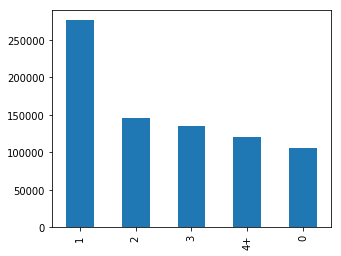

In [40]:
data['Stay_In_Current_City_Years'].value_counts().plot(kind="bar",figsize=(5,4)) #*customer who stays fro 1 year or less than year will buy more products              

In [41]:
data.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

#### converting categorical to nuemarical

In [42]:
data["Gender"].replace("F",0,inplace=True)
data["Gender"].replace('M',1,inplace=True)

In [43]:
data["Age"].replace('0-17','17',inplace=True)
data["Age"].replace('55+','56',inplace=True)
data["Age"].replace('26-35','30',inplace=True)
data["Age"].replace('46-50','48',inplace=True)
data["Age"].replace('51-55','53',inplace=True)
data["Age"].replace('36-45','40',inplace=True)
data["Age"].replace('18-25','21',inplace=True)

In [44]:
data["City_Category"].replace('A',3,inplace=True)
data["City_Category"].replace('B',2,inplace=True)
data['City_Category'].replace('C',1,inplace=True)

In [45]:
data.dtypes

Age                            object
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years     object
User_ID                         int64
dtype: object

In [46]:
data["Age"].replace('0-17',17,inplace=True)
data["Age"].replace('55+',56,inplace=True)
data["Age"].replace('26-35',30,inplace=True)
data["Age"].replace('46-50',48,inplace=True)
data["Age"].replace('51-55',53,inplace=True)
data["Age"].replace('36-45',40,inplace=True)
data["Age"].replace('18-25',21,inplace=True)

In [47]:
data['Stay_In_Current_City_Years'].replace('1',1,inplace=True)
data['Stay_In_Current_City_Years'].replace('2',2,inplace=True)
data['Stay_In_Current_City_Years'].replace('3',3,inplace=True)
data['Stay_In_Current_City_Years'].replace('4+',4,inplace=True)
data['Stay_In_Current_City_Years'].replace('0',0,inplace=True)

### BI-VARIATE ANALYSIS

In [48]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,17,3,0,0,10,3,0.0,0.0,P00069042,8370.0,2,1000001
1,17,3,0,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,17,3,0,0,10,12,0.0,0.0,P00087842,1422.0,2,1000001
3,17,3,0,0,10,12,14.0,0.0,P00085442,1057.0,2,1000001
4,56,1,1,0,16,8,0.0,0.0,P00285442,7969.0,4,1000002


In [49]:
import seaborn as sns

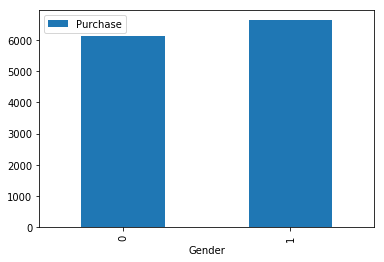

In [50]:
data[['Gender','Purchase']].groupby('Gender').mean().plot.bar()


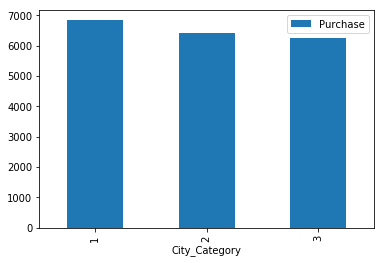

In [51]:
data[['City_Category','Purchase']].groupby('City_Category').mean().plot.bar() ## on average city-A is high in purchase


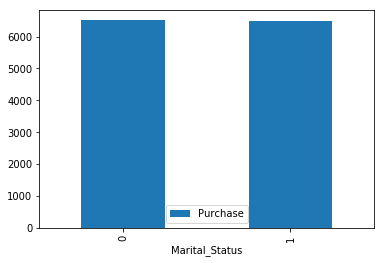

In [52]:
data[['Marital_Status','Purchase']].groupby('Marital_Status').mean().plot.bar() ## on average married is high in purchase


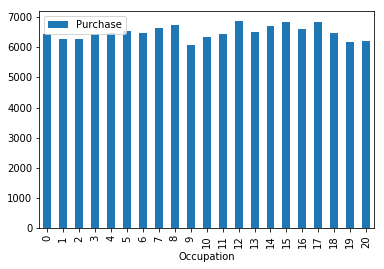

In [53]:
data[['Occupation','Purchase']].groupby('Occupation').mean().plot.bar() ## 

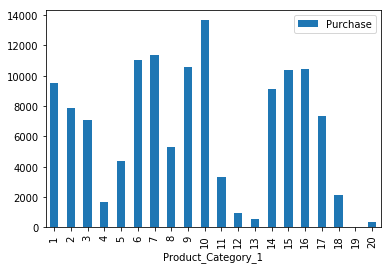

In [54]:
data[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean().plot.bar() ## 

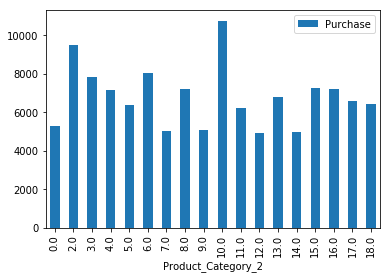

In [55]:
data[['Product_Category_2','Purchase']].groupby('Product_Category_2').mean().plot.bar() ## 

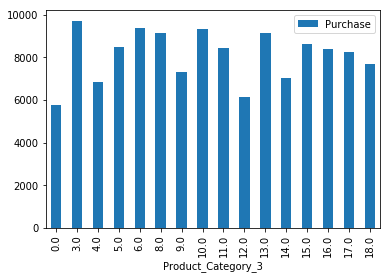

In [56]:
data[['Product_Category_3','Purchase']].groupby('Product_Category_3').mean().plot.bar() ## 

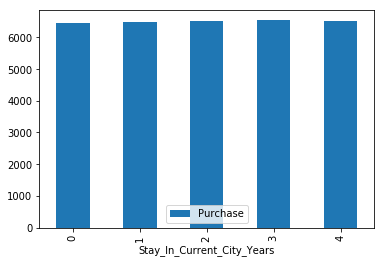

In [57]:
data[['Stay_In_Current_City_Years','Purchase']].groupby('Stay_In_Current_City_Years').mean().plot.bar() ## alamost same

In [58]:
data.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

In [59]:
data.dtypes

Age                            object
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years      int64
User_ID                         int64
dtype: object

In [60]:
data['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

### HYPOTESIS TEST FOR EACH VARIABLE TO TAGET VARIABLE

Interpretation

H0: the means of the samples are equal.
H1: the means of the samples are unequal.

In [61]:

from scipy.stats import ttest_ind

In [74]:
stat, p = ttest_ind(data["Purchase"][data["Marital_Status"]==0],data["Purchase"][data['Marital_Status']==1])
print(stat,p)

0.4859305326716183 0.6270165554878464


As the p-value is more than 0.05(significance level),i.e the means are not different and the varible shows no importance in model building

In [75]:
ttest_ind(data["Purchase"][data["Gender"]==0],data["Purchase"][data['Gender']==1])

Ttest_indResult(statistic=-31.985658985615512, pvalue=2.4111145572901154e-224)

As the p-value is less than 0.05(significance level),i.e the means are different and the varible shows some importance in model building

In [80]:

from scipy import stats

In [97]:
f ,p =stats.f_oneway(data["Purchase"][data["Age"]==17],data["Purchase"][data['Age']==56],data["Purchase"][data['Age']==30],data["Purchase"][data['Age']==48],data["Purchase"][data['Age']==53],data["Purchase"][data['Age']==40],data["Purchase"][data['Age']==21])
print(f ,p )

19.411655554854836 9.013196100996416e-23


As the p-value is less than 0.05(significance level),i.e the means are different and the varible shows some importance in model building

In [104]:
f ,p =stats.f_oneway(data["Purchase"][data["City_Category"]==1],data["Purchase"][data["City_Category"]==2],data["Purchase"][data["City_Category"]==3])
f,p

(567.903397525555, 3.4773476819684765e-247)

As the p-value is less than 0.05(significance level),i.e the means are different and the varible shows some importance in model building

In [112]:
f ,p =stats.f_oneway(data["Purchase"][data["Stay_In_Current_City_Years"]==0],data["Purchase"][data["Stay_In_Current_City_Years"]==1],data["Purchase"][data["Stay_In_Current_City_Years"]==2],data["Purchase"][data["Stay_In_Current_City_Years"]==3],data["Purchase"][data["Stay_In_Current_City_Years"]==4])
f,p

(3.476633015615315, 0.00759977083386078)

As the p-value is less than 0.05(significance level),i.e the means are different and the varible shows some importance in model building

label encoding the product ID variable

In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [120]:
data["Product_ID"]=le.fit_transform(data["Product_ID"])

In [95]:
data['Age']=pd.to_numeric(data['Age'])

In [113]:
data.dtypes

Age                             int64
City_Category                   int64
Gender                          int64
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Purchase                      float64
Stay_In_Current_City_Years      int64
User_ID                         int64
dtype: object

### MODEL

In [122]:
train_new=data.iloc[:550068,:]
test_new=data.iloc[550068:,:]

In [123]:
x=train_new.drop(['Purchase'],axis=1)
y=train_new["Purchase"]

In [124]:
train_new.shape,train.shape


((550068, 12), (550068, 12))

In [125]:
train_new.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
dtype: int64

In [126]:
test_new.isnull().sum()


Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
dtype: int64

In [127]:
test_new.shape,test.shape


((233599, 12), (233599, 11))

##### linear model with all varables

In [128]:

x=train_new.drop(['Purchase'],axis=1)
y=train_new["Purchase"]

#### Train_test split

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(x,y, test_size =0.3)

In [147]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_cv)


In [148]:
from sklearn.metrics import mean_squared_error

In [149]:
np.sqrt(mean_squared_error(pred_lr,y_cv))

4630.794431721326

In [134]:
data.columns

Index(['Age', 'City_Category', 'Gender', 'Marital_Status', 'Occupation',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Product_ID', 'Purchase', 'Stay_In_Current_City_Years', 'User_ID'],
      dtype='object')

##### linear model without 'marital status'

In [169]:
x1=train_new.drop(['Purchase','Marital_Status'],axis=1)
y=train_new["Purchase"]

In [171]:
from sklearn.model_selection import train_test_split
x1_train, x_cv, y1_train, y_cv = train_test_split(x1,y, test_size =0.3)

In [159]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_cv)

In [160]:
np.sqrt(mean_squared_error(pred_lr,y_cv))

4604.1504896132055

The RMSE value decreased when the model is built without 'Marital_status' variable

#### Xgboost model with all variables

In [163]:
from xgboost import XGBRegressor
import xgboost as xgb
regr = xgb.XGBRegressor(colsample_bytree=0.2,
                      gamma=0.0,
                      learning_rate=0.05,
                      max_depth=6,
                      min_child_weight=1.5,
                      n_estimators=100,
                      reg_alpha=0.9,
                      reg_lambda=0.6,
                      subsample=0.2,
                      seed=42,
                      silent=1)

In [164]:
regr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

In [172]:
answer=regr.predict(x_cv)
np.sqrt(mean_squared_error(answer,y_cv))

2985.0942344758078

#### Xgboost model without 'marital status' variable

In [174]:
regr.fit(x1_train,y1_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.0, importance_type='gain',
       learning_rate=0.05, max_delta_step=0, max_depth=6,
       min_child_weight=1.5, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0.9,
       reg_lambda=0.6, scale_pos_weight=1, seed=42, silent=1,
       subsample=0.2)

In [175]:
answer=regr.predict(x_cv)
np.sqrt(mean_squared_error(answer,y_cv))

2981.5366329436065

### RIDGE REGRESSION

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.linear_model import Ridge

In [9]:
ridge = Ridge()

In [11]:
parameters = {'alpha':[le-15,le-10,le-8,le-3,le-4,le-3,le-2,1,5,10,20]}

TypeError: unsupported operand type(s) for -: 'LabelEncoder' and 'int'